# ---------------------------------------Opgaveaflevering 3------------------------------------------
##### ITMAL
##  O1
**Gruppe 15**

**14-04-2012**
 
### Morten Haahr Kristensen
- **Studienummer: 2010960315**

### Thomas Holst Ulriksen
- **Studienummer: 201806733**

### Christoffer Fjord
- **Studienummer: 201805410**


# ----------------------------------Capacity and under/overfitting-------------------------------
I denne opgave ville vi se nærmer på under/overfitting, hvordan det opstår, hvilke konsekvenser der kan have for ens model, samt hvilke tiltag man kan tage for at forhindre det.


Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

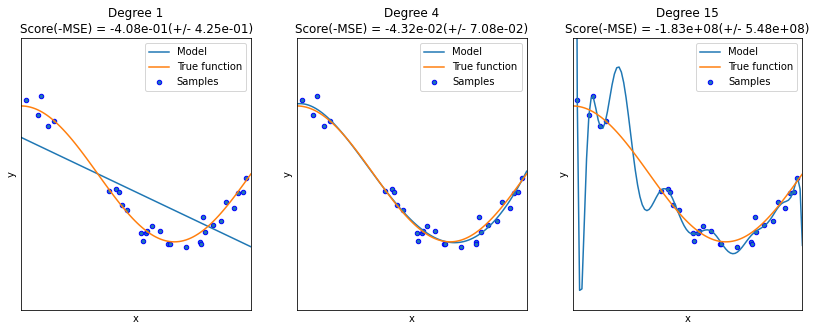

OK


In [6]:
# TODO: code review 
#assert False, "TODO: remove me, and review this code"

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

### Qa) Resumé af kodecelle
I opgaven er der blevet givet en kodecelle. Denne ses ovenfor. Opgaven bestod derefter i at give et overblik over, hvad koden gør. Dette ses nedenfor.

I starten bliver dataen genereret ved at køre funktionen `GenerateData()`. Denne skaber nogle tilfælde normalfordelte datasamples, som lægges ind i en cosinus funktion for at generer et sandhedsmatrix med et tilfældigt offset (kunne simulerer støj). <br>
De grader af polynomier, som vil blive undersøgt, fastlægges i variablen `degrees`. Et for-loop startes, som itereres igennem 3 gange. Første gang skaber den en lineær regression af første grad, og forsøger at fitte modellen til dataen. Der bliver anvendt `PolynomialFeatures()` funktionen, som anvendes til at lave en ny matrix, som indeholder alle mulige kombinationer af polynomier afhængigt af den grad, der gives som parameter. Der bliver desuden genereret et plot for modellen. Processen gentages for alle værdier i variablen `degrees`, dvs. med 4. og 15. grads polynomier.<br>
Det ses ud fra figurerne at ved 1. grads polynomiet er der en tydelig underfitting og tydelig overfitting ved 15. grads polynomiet. Ved 4. grads polynomiet passer modellen rigtig godt med "True function", som er en cosinus med tillagt støj.

### Qb) Forklaring af kapacitet, over- og underfitting

**Kapacitet:**<br>
Kapacitet er et blødt begreb, som beskriver hvor fleksibel og kompleks en model potentielt kan være. Kapaciteten af en model afhænger af hvilken type model der anvendes. Eksempler på måder at kvantificere kapaciteter:
* Lineær regression: Kapaciteten afhænger af graden af polynomiet.
* K-Nearest Neighbours: Kapaciteten afhænger af K.
* Neurale netværk: Kapaciteten afhænger af mængden af neuroner og lag.

**Underfitting:**<br>
En underfitted model vil give en dårlig prædiktion, fordi den ikke er fleksibel nok til at passe på dataen. Hvis man kigger på "Degree 1" figuren fra forrige opgave, er den underfitted, fordi den forsøger at fitte en ret linje til en cosinus funktion. Ved underfitting vil man se, at kapaciteten for ens model er for lav.

**Overfitting:**<br>
En overfitted model er det modsatte af en underfitted. Den vil være meget fleksibel i forhold til at finde en prædiktion, og modellen passer rigtig godt på træningsdataen. Udfordringen kommer, når den skal prædiktere på ny data, da det ikke nødvendigvis følger samme tendens som træningsdaten. En overfitted model vil forsøge at få det til at passe for godt med træningsdataen. Ved overfitting vil man se, at kapaciteten for ens model er for høj.

**Eksempel med polynomer<br>**
Det blev set i opgave Qa) at 1. grads polynomiet var underfitted, da dens kapacitet (grad) ikke var høj nok.<br>
Det blev set i opgave Qa) at 4. grads polynomiet var et godt fit, da dens kapacitet var passende.<br>
Det blev set i opgave Qa) at 15. grads polynomiet var overfitted, da dens kapacitet (grad) var for høj.

### Qc) Scorings metode
Der bliver stillet spørgsmål til hvorfor der anvendes `neg_mean_squared_error` i stedet for bare `mean_squared_error`. Dette skyldes at der arbejdes med en score funktion, hvortil det ønskes at jo højere score ens model har, jo bedre er den. Ved almindelig `mean_squared_error` (som bruges til cost functions) angiver en højere værdi at modellen performer dårligere. Ved at flippe fortegnet, kan `mean_squared_error` anvendes som score function.

Der bliver desuden spurgt ind til, hvad der sker, hvis `scoring` ændres til `mean_squared_error`. Dette er forsøgt i kodecellen nedenfor, hvortil det ses, at en `ValueError` bliver raised. Dette skyldes at funktionen kun godtager visse tekst-strenge, den samme exception bliver raised, hvis man angiver `scoring="ITMAL"`. De mulige `scoring` værdier kan ses ved at køre `sorted(sklearn.metrics.SCORERS.keys())`. 

Ved anvendelse af `neg_mean_squared_error` vil de teoretiske minimum og maksimum score værdier ligge mellem $[-\infty;0]$, da en normal `mean_squared_error` ligger mellem $[0;\infty]$.

Til sidst bliver der spurgt ind til hvorfor 15. grads polynomiet har en score, som er meget lille ($-1.8\cdot10^8$). Dette skyldes at modellen passer rigtig godt med træningsdataen, men passer meget dårligt med valideringssættet. Den vil derfor være rigtig god til at prædiktere træningsdataen, men dårlig til at prædiktere ny data.


Iterating...degrees= [1, 4, 15]


ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

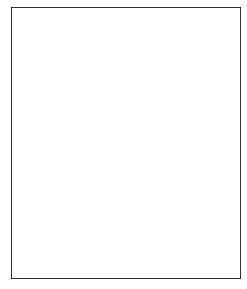

In [8]:
# TODO: code review 
#assert False, "TODO: remove me, and review this code"

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

# ----------------------------------------Generaliserings fejl-----------------------------------------
Denne opgave omhandler vigtige koncepter indenfor træning af modeller. Blandt andet modellens fejl der ønskes minimeres.

### Qa) Lidt om generaliserings fejl

I denne opgave vil figuren nedenfor blive beskrevet i detaljer. Figuren stammer fra bogen Deep Learning af forfatterne Aaron Courville, Ian Goodfellow, and Yoshua Bengio.

<img src="https://blackboard.au.dk/bbcswebdav/courses/BB-Cou-UUVA-94506/Fildeling/L07/Figs/dl_generalization_error.png" alt="WARNING: you need to be logged into Blackboard to view images" style="height:500px">

Hvis man kigger på akserne på figuren, vil man kunne se at x-aksen beskriver en arbitrær models kapacitet, og y-aksen beskriver dens fejl. Der er desuden tegnet to grafer på figuren, hvor den blå stiplede graf viser fejlen for træningssættet og den grønne indikerer fejlen for valideringssættet (generaliserings fejl). Forfatterne har desuden inddelt grafen i to zoner - underfitting og overfitting zones. Ved underfitting kan det ses, at begge typer fejl kan forbedres ved en forøgelse af kapacitet. Ved overfitting kan det ses, at træningsfejlen går imod 0, men at generaliserings fejlen stiger. Zonerne opdeles af en rød linje, som betegner den optimale kapacitet. Denne findes ved minimum for generaliserings fejlen. Til sidst er der et "generalization gab", som betegner forskellen mellem fejlen på træningssættet og generaliserings fejlen. 

### Qb) Resumé af kode til generering af forhold mellem træningsfejl og generaliserings fejl
I denne opgave er der blevet givet tre kodeceller, som skal forklares. Forklaringen kan ses lige under kodecellerne.

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


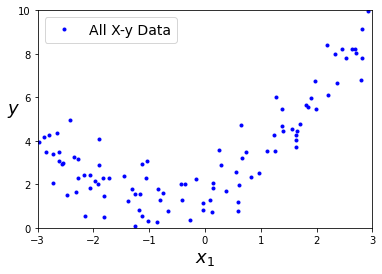

OK


In [2]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')

### Qb) fortsat:
Ud fra kodecellen ovenfor ses det, at dataen til den kommende model genereres. Denne gang skabes der noget tilfældigt normalfordelt data med et offset. Y er et 2. grads polynomium med noget støj tilført. Dataen opdeles efterfølgende i trænings- og valideringssæt. Der laves dataprocessering ved at oprette en pipeline, som indeholder `PolynomialFeatures()` og `StandardScaler()`. Designmatricen udvides til at indeholde 90 søjler i stedet for én, for at kunne dække et 90. grads polynomium. Til sidst plottes dataen.

In [3]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

  epoch= 201, mse_train=0.75, mse_val=1.39
  epoch= 202, mse_train=0.75, mse_val=1.39
  epoch= 203, mse_train=0.75, mse_val=1.39
  epoch= 204, mse_train=0.75, mse_val=1.39
  epoch= 205, mse_train=0.74, mse_val=1.39
  epoch= 206, mse_train=0.74, mse_val=1.38
  epoch= 207, mse_train=0.74, mse_val=1.38
  epoch= 208, mse_train=0.74, mse_val=1.38
  epoch= 209, mse_train=0.73, mse_val=1.38
  epoch= 210, mse_train=0.73, mse_val=1.38
  epoch= 211, mse_train=0.73, mse_val=1.37
  epoch= 212, mse_train=0.73, mse_val=1.37
  epoch= 213, mse_train=0.73, mse_val=1.37
  epoch= 214, mse_train=0.72, mse_val=1.37
  epoch= 215, mse_train=0.72, mse_val=1.37
  epoch= 216, mse_train=0.72, mse_val=1.37
  epoch= 217, mse_train=0.72, mse_val=1.36
  epoch= 218, mse_train=0.72, mse_val=1.36
  epoch= 219, mse_train=0.71, mse_val=1.36
  epoch= 220, mse_train=0.71, mse_val=1.36
  epoch= 221, mse_train=0.71, mse_val=1.36
  epoch= 222, mse_train=0.71, mse_val=1.36
  epoch= 223, mse_train=0.71, mse_val=1.36
  epoch= 22

  epoch= 465, mse_train=0.54, mse_val=1.89
  epoch= 466, mse_train=0.54, mse_val=1.89
  epoch= 467, mse_train=0.54, mse_val=1.89
  epoch= 468, mse_train=0.54, mse_val=1.89
  epoch= 469, mse_train=0.54, mse_val=1.90
  epoch= 470, mse_train=0.54, mse_val=1.90
  epoch= 471, mse_train=0.54, mse_val=1.90
  epoch= 472, mse_train=0.54, mse_val=1.91
  epoch= 473, mse_train=0.54, mse_val=1.91
  epoch= 474, mse_train=0.54, mse_val=1.91
  epoch= 475, mse_train=0.54, mse_val=1.92
  epoch= 476, mse_train=0.54, mse_val=1.92
  epoch= 477, mse_train=0.54, mse_val=1.92
  epoch= 478, mse_train=0.54, mse_val=1.92
  epoch= 479, mse_train=0.54, mse_val=1.93
  epoch= 480, mse_train=0.54, mse_val=1.93
  epoch= 481, mse_train=0.54, mse_val=1.93
  epoch= 482, mse_train=0.54, mse_val=1.94
  epoch= 483, mse_train=0.54, mse_val=1.94
  epoch= 484, mse_train=0.54, mse_val=1.94
  epoch= 485, mse_train=0.54, mse_val=1.95
  epoch= 486, mse_train=0.54, mse_val=1.95
  epoch= 487, mse_train=0.54, mse_val=1.95
  epoch= 48

### Qb) fortsat:
I den ovenstående kodecelle ses det, at der først og fremmest defineres en funktion `Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False)`. Denne funktion tager et træningssæt og et valideringssæt og træner en `SGDRegressor` `n_epochs` gange på det samme data. En epoke angiver altså, hvor mange gange modellen er blevet trænet på dataen. Den printer derefter iterations nummeret, mean-squared-error for træningssættet og mean-squared-error på valideringssættet.<br>
Ud fra printet ved kald af funktionen, kan det ses, at `mse_train` falder gennem alle epoker, men at `mse_val` falder indtil omkring 240 epoker, og derefter stiger igen. `mse_train` angiver MSE fejlen for træningssættet og `mse_val` angiver MSE fejlen for valideringssættet.

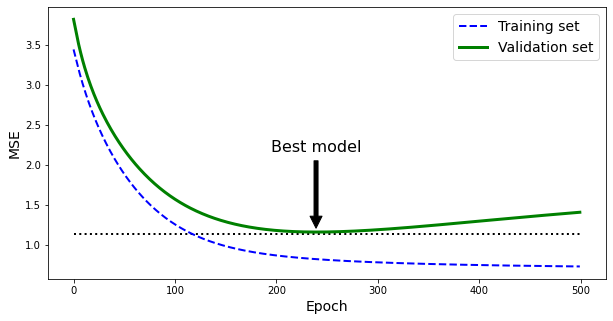

In [4]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.show()

### Qb) fortsat:
Den sidste kodecelle til opgave Qb) ses ovenfor. I denne celle tegnes en graf med MSE fejlen i træningssættet og valideringssættet. Det ses at træningssættets fejl bevæger sig mod 0, men at valideringssættets fejl stiger efter cirka 240 epoker.

### Qc) Early Stopping

Der bliver stillet spørgsmålstegn til, hvordan "early stopping" kunne implementeres i koden fra Qb). Early stopping betyder at træningen stoppes når den bedste model er opnået. Dette findes ved at kigge på fejlen ved ens validation set. Når denne fejl begynder at stige vides det, at den bedste model er opnået.<br>
Pseudo-koden ses nedenfor:

    if(mse_val_current > mse_val_last ):
        stop training!
    else:
        mse_val_last = mse_val_current

### Qd) Forklaring til RMSE-capacity plot
Kodecellen nedenfor blev givet til opgaven. Den tegner et RMSE-capacity plot for lineære regression, der blev arbejdet med i det tidligere opgavesæt til L07. Forklaring til opgaven ses under cellen.

Iterating...degrees= range(1, 8)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44


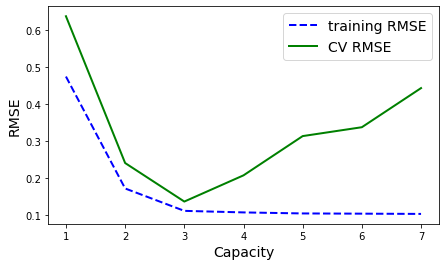

OK


In [5]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_cv= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_cv=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_cv:4.2f}")
    
    capacities    .append(d)
    rmses_training.append(rmse_training)
    rmses_cv      .append(rmse_cv)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training, "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_cv, "g-", linewidth=2, label="CV RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

### Qd) fortsat:

Der bliver stillet spørgsmål til hvordan grafen forløber. På figuren ovenfor angiver x-aksen kapaciteten, som er direkte forbundet med den antallet af grader i den lineære regression. Y-aksen beskriver root-mean-squared-error, som er den anvendte cost-function. Det ses at grafen er aftagende indtil en kapacitet på 3 (dvs. et 3. grads polynomium). Træningsfejlen bliver ved med at falde, da en højere kapacitet vil få modellen til at prædiktere meget nøjagtigt ud fra træningsdataen. En stigende kapacitet har dog ulempen, at det på sigt vil gøre modellen overfitted, hvilket vil sige, at den generaliserer dårligt til ny data. Det er det, som ses ved at valideringssættet ved kapacitet > 3 stiger. Her er modellen overfitted.

#### Konklusion
Der er i denne opgave opnået kendskab til generaliserings fejl og hvordan den kan hjælpe til at finde den bedst mulige model til den givne opgave. Derudover er forskellige termer indenfor generaliserings fejl blevet vendt og beskrevet. Kapacitet, under- og overfitting er koncepter som tilmed er blevet indbragt i denne opgave. Nogle ad disse koncepter er gået på tværs af flere opgaversæt. 

# ----------------------------------------------Regulizers------------------------------------------------
I denne opgave ville vi se på regulizers hvordan de virker, samt hvordan de kan anvendes til at undgå overfitting. 

### Qa) Nu med penalty
Her ville vi lave en penalty funktion Omega, og teste den imod den kode som er give på forhånd.
<br>
Først laver vi vores Omega funktion ved at anvende NumPys dot funktion til at gange vægt matrixen sammen med sig selv transponeret. Her er det vigtigt ikke at med bias vægten på plads 0 med. Herefter kører vi koden og kan se at vores resultater er korrekte. <br>

Penalty faktorens størrelse afhænger af både antallet af vægt, samt deres størrelse. Des flere vægte der er, des større er $\Omega$. Des større værdi vægtene har, des større er $\Omega$.


In [4]:
# Qa..first define some numeric helper functions for the test-vectors..

import numpy as np
import collections

def isFloat(x):
    # is there a python single/double float??
    return isinstance(x, float) or isinstance(x, np.float32) or isinstance(x, np.float64)
    # NOT defined on Windows?:   or isinstance(x, np.float128)      

# Checks that a 'float' is 'sane' (original from libitmal)
def CheckFloat(x, checkrange=False, xmin=1E-200, xmax=1E200, verbose=0):
    if verbose>1:
        print(f"CheckFloat({x}, type={type(x)}")
    if isinstance(x, collections.Iterable):
        for i in x:
            CheckFloat(i, checkrange=checkrange, xmin=xmin, xmax=xmax, verbose=verbose)
    else:
        #if (isinstance(x,int)):
        #    print("you gave me an integer, that was ignored")
        #    return
        assert isFloat(x), f"x={x} is not a float/float64/numpy.float32/64/128, but a {type(x)}"
        assert np.isnan(x)==False , "x is NAN"
        assert np.isinf(x)==False , "x is inf"
        assert np.isinf(-x)==False, "x is -inf"
        # NOTE: missing test for denormalized float
        if checkrange:
            z=fabs(x)
            assert z>=xmin, f"abs(x)={z} is smaller that expected min value={xmin}"
            assert z<=xmax, f"abs(x)={z} is larger that expected max value={xmax}"
        if verbose>0:
             print(f"CheckFloat({x}, type={x} => OK")

# Checks that two 'floats' are 'close' (original from libitmal)
def CheckInRange(x, expected, eps=1E-9, autoconverttofloat=True, verbose=0):
    assert eps>=0, "eps is less than zero"
    if autoconverttofloat and (not isFloat(x) or not isFloat(expected) or not isFloat(eps)):
        if verbose>1:
            print(f"notice: autoconverting x={x} to float..")
        return CheckInRange(1.0*x, 1.0*expected, 1.0*eps, False, verbose)
    CheckFloat(x)
    CheckFloat(expected)
    CheckFloat(eps)
    x0 = expected - eps
    x1 = expected + eps
    ok = x>=x0 and x<=x1
    absdiff = np.fabs(x-expected)
    if verbose > 0:
        print(f"CheckInRange(x={x}, expected={expected}, eps={eps}: x in [{x0}; {x1}] => {ok}")
    assert ok, f"x={x} is not within the range [{x0}; {x1}] for eps={eps}, got eps={absdiff}"

print("OK(setup..)")

OK(setup..)


In [6]:
def Omega(w):
    w = w[1:] # Discard bias term
    return np.dot(np.transpose(w), w)
 
# weight vector format: [w_0 w_1 .. w_d], ie. elem. 0 is the 'bias'    
w_a = np.array([1., 2., -3.])  
w_b = np.array([1E10, -3E10])
w_c = np.array([0.1, 0.2, -0.3, 0])

p_a = Omega(w_a)
p_b = Omega(w_b)
p_c = Omega(w_c)

print(f"P(w0)={p_a}")
print(f"P(w1)={p_b}")
print(f"P(w2)={p_c}")

# TEST VECTORS
e0 = 2*2+(-3)*(-3)
e1 = 9e+20
e2 = 0.13

CheckInRange(p_a, e0)
CheckInRange(p_b, e1)
CheckInRange(p_c, e2)

print("OK")

P(w0)=13.0
P(w1)=9e+20
P(w2)=0.13
OK


### Qb) $\alpha$ i forbindelse med penalty faktorer

Opgaven lød på at køre nedenstående kodecelle, og derefter forklare hvad effekten af $\alpha$ egentlig er ud fra plottet med Ridge Penalization.<br>
Ud fra nedenstående graf og udtrykket for $\Omega$ fra tidligere, kan det først og fremmest konkluderes, at ved $\alpha = 0$, har $\Omega$ ingen indflydelse (da det multipliceres med 0). Det medfører at denne model er meget fleksibel - den kan måske betegnes som overfitted.<br>
På samme tid kan det ses at ved $\alpha = 1$ er modellen ikke særlig fleksibel. Her bliver størstedelen af vægtene dæmpet fuldstændig.<br>
Til sidst kan det ses at ved $\alpha = 1\cdot10^{-05}$ er der fundet en mellemvej. Her er modellen stadig fleksibel, men formentlig ikke overfitted længere.

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7442427393463036, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(
C:\Users\thoma\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7739590093335167, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


OK(plot)


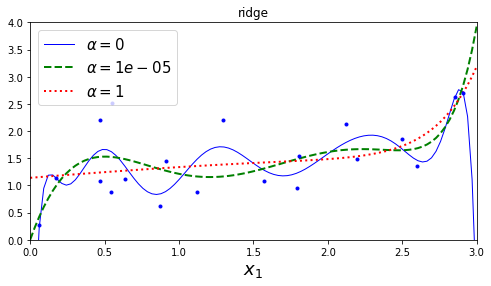

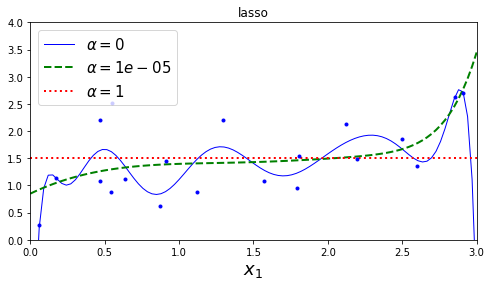

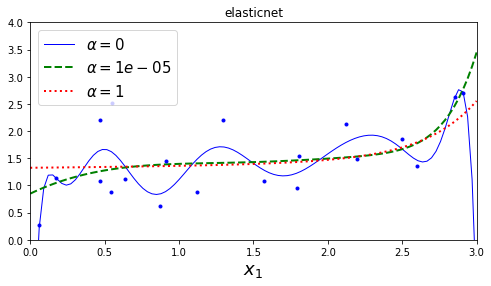

In [7]:
%matplotlib inline

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def FitAndPlotModel(name, model_class, X, X_new, y, **model_kargs):
    plt.figure(figsize=(8,4))
    
    alphas=(0, 10**-5, 1) 
    random_state=42
    
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #print(model_kargs)
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model_pipe = Pipeline([
                ("poly_features", PolynomialFeatures(degree=12, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
            
        model_pipe.fit(X, y)
        y_new_regul = model_pipe.predict(X_new)
        
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(name)
    plt.axis([0, 3, 0, 4])

def GenerateData():
    np.random.seed(42)
    m = 20
    X = 3 * np.random.rand(m, 1)
    y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    return X, X_new, y
    
X, X_new, y = GenerateData()

FitAndPlotModel('ridge',      Ridge,        X, X_new, y)
FitAndPlotModel('lasso',      Lasso,        X, X_new, y)
FitAndPlotModel('elasticnet', ElasticNet,   X, X_new, y, l1_ratio=0.1)

print("OK(plot)")

### Qc) Forklaring til forskellige typer af penalization

<b>Ridge:</b><br>
$\Omega(\mathbf{w})=\|\mathbf{w}\|_{2}^{2}$<br>
Anvender $L_2$ normen. Reducerer de unødvendige features' bidrag og gør dem så små, at de næsten ikke har nogen indflydelse.<br>
<b>Lasso:</b><br>
$\Omega(\mathbf{w})=\|\mathbf{w}\|_{1}$<br>
Anvender $L_1$ normen. Minder meget om Ridge, men har muligheden for at eliminere features helt, såfremt de ikke er nødvendige.<br>
<b>ElasticNet:</b><br>
$\Omega(\mathbf{w})=\beta\|\mathbf{w}\|_{1}+(1-\beta)\|\mathbf{w}\|_{2}^{2}$<br>
Anvender både $L_2 + L_1$ normen, og har en vægt `r` foran sig, som indikerer hvor stor indflydelse hhv. Ridge og Lasso skal have. Kombinerer feature elimination fra Lasso, men også feature koefficient reduktion


### Qd) Regularisering og dets modvirkning af overfitting

Den første del af opgaven bad os klargøre, hvordan regularisering kan benyttes til at modvirke overfitting.<br>
Når en model er overfitted, svarer det til, at den har en for høj kapacitet. Dette kan man også betegne som, at den har en for mange "degrees of freedom" (frihedsgrader). Ved regularisering bliver der dæmpet/slukket for nogle af disse frihedsgrader og features, så modellen er knap så fleksibel. På den måde kan en overfitted model forbedres.

Desuden skulle det forklares hvad der menes, at der er en __tug-of-war__ (tovtrækning) mellem MSE ($J$) og regulariseringen ($\Omega$).<br>
Med tovtrækningen mellem MSE og regulariseringen menes der, at der i udtrykket for $\tilde{J}$, fremgår to led - det ene er vores cost function MSE, det andet er regulariseringen. MSE leddet forsøges minimeret, mens at regulariserings leddet hæver $\tilde{J}$.

Til sidst skal det forklares, hvilke udfordringer det kan give, hvis de ikke-regulariserede vægte $\textbf{w}^*$ ligger langt fra origo, men der også er valgt en $\alpha=1$ til regulariseringen.<br>
Hvis $\textbf{w}^*$ ligger langt fra origo, men der er valgt en $\alpha=1$, vil det betyde, at hver vægt i ens model vil have en stor indflydelse, hvilket kan lede til overfitting. 


# ----------------------------------------------GridSearch-----------------------------------------------
I denne opgave vil GridSearch og RandomizedSearch blive undersøgt.

### Qa) Forklaring til hvad GridSearch er
Den første opgave bestod af at forklare, hvad GridSearch helt konkret er. Der blev givet to kodeceller, hvortil den første skulle beskrives overfladisk, og den anden skulle beskrives mere dybdegående, ved de steder, hvor GridSearch fremtræder.

In [1]:
from time import time
import numpy as np

from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn import datasets

from libitmal import dataloaders as itmaldataloaders # Needed for load of iris, moon and mnist

currmode="N/A" # GLOBAL var!

def SearchReport(model): 
    
    def GetBestModelCTOR(model, best_params):
        def GetParams(best_params):
            ret_str=""          
            for key in sorted(best_params):
                value = best_params[key]
                temp_str = "'" if str(type(value))=="<class 'str'>" else ""
                if len(ret_str)>0:
                    ret_str += ','
                ret_str += f'{key}={temp_str}{value}{temp_str}'  
            return ret_str          
        try:
            param_str = GetParams(best_params)
            return type(model).__name__ + '(' + param_str + ')' 
        except:
            return "N/A(1)"
        
    print("\nBest model set found on train set:")
    print()
    print(f"\tbest parameters={model.best_params_}")
    print(f"\tbest '{model.scoring}' score={model.best_score_}")
    print(f"\tbest index={model.best_index_}")
    print()
    print(f"Best estimator CTOR:")
    print(f"\t{model.best_estimator_}")
    print()
    try:
        print(f"Grid scores ('{model.scoring}') on development set:")
        means = model.cv_results_['mean_test_score']
        stds  = model.cv_results_['std_test_score']
        i=0
        for mean, std, params in zip(means, stds, model.cv_results_['params']):
            print("\t[%2d]: %0.3f (+/-%0.03f) for %r" % (i, mean, std * 2, params))
            i += 1
    except:
        print("WARNING: the random search do not provide means/stds")
    
    global currmode                
    assert "f1_micro"==str(model.scoring), f"come on, we need to fix the scoring to be able to compare model-fits! Your scoreing={str(model.scoring)}...remember to add scoring='f1_micro' to the search"   
    return f"best: dat={currmode}, score={model.best_score_:0.5f}, model={GetBestModelCTOR(model.estimator,model.best_params_)}", model.best_estimator_ 

def ClassificationReport(model, X_test, y_test, target_names=None):
    assert X_test.shape[0]==y_test.shape[0]
    print("\nDetailed classification report:")
    print("\tThe model is trained on the full development set.")
    print("\tThe scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)                 
    print(classification_report(y_true, y_pred, target_names))
    print()
    
def FullReport(model, X_test, y_test, t):
    beststr, bestmodel = SearchReport(model)
    ClassificationReport(model, X_test, y_test)    
    print(f"SEARCH TIME: {t:0.2f} sec")
    print(f"CTOR for best model: {bestmodel}\n")
    print(f"{beststr}\n")
    return beststr, bestmodel
    
def LoadAndSetupData(mode, test_size=0.3):
    assert test_size>=0.0 and test_size<=1.0
    
    def ShapeToString(Z):
        n = Z.ndim
        s = "("
        for i in range(n):
            s += f"{Z.shape[i]:5d}"
            if i+1!=n:
                s += ";"
        return s+")"

    global currmode
    currmode=mode
    print(f"DATA: {currmode}..")
    
    if mode=='moon':
        X, y = itmaldataloaders.MOON_GetDataSet(n_samples=5000, noise=0.2)
        itmaldataloaders.MOON_Plot(X, y)
    elif mode=='mnist':
        X, y = itmaldataloaders.MNIST_GetDataSet(load_mode=0)
        if X.ndim==3:
            X=np.reshape(X, (X.shape[0], -1))
    elif mode=='iris':
        X, y = itmaldataloaders.IRIS_GetDataSet()
    else:
        raise ValueError(f"could not load data for that particular mode='{mode}', only 'moon'/'mnist'/'iris' supported")
        
    print(f'  org. data:  X.shape      ={ShapeToString(X)}, y.shape      ={ShapeToString(y)}')

    assert X.ndim==2
    assert X.shape[0]==y.shape[0]
    assert y.ndim==1 or (y.ndim==2 and y.shape[1]==0)    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0, shuffle=True
    )
    
    print(f'  train data: X_train.shape={ShapeToString(X_train)}, y_train.shape={ShapeToString(y_train)}')
    print(f'  test data:  X_test.shape ={ShapeToString(X_test)}, y_test.shape ={ShapeToString(y_test)}')
    print()
    
    return X_train, X_test, y_train, y_test

print('OK(function setup, hope MNIST loads works, seem best if you got Keras or Tensorflow installed!)')

OK(function setup, hope MNIST loads works, seem best if you got Keras or Tensorflow installed!)


### Qa) Fortsat:
`SearchReport` - tager en trænet model og printer parametrene fra den bedste model.<br>
`ClassificationReport` - Udskriver information fra Scikit-learns `classification_report` funktion, og gør det ud fra testdataen. <br>
`LoadAndSetupData` - indlæser dataen og og opdeler i train/test-splits. <br>
`FullReport` - samler de tidligere beskrevede funktioner.

In [2]:
# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = svm.SVC(
    gamma=0.001
)  # NOTE: gamma="scale" does not work in older Scikit-learn frameworks,
# FIX:  replace with model = svm.SVC(gamma=0.001)

tuning_parameters = {
    'kernel': ('linear', 'rbf'), 
    'C': [0.1, 1, 10]
}

CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
start = time()
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)


Best model set found on train set:

	best parameters={'C': 1, 'kernel': 'linear'}
	best 'f1_micro' score=0.9714285714285715
	best index=2

Best estimator CTOR:
	SVC(C=1, gamma=0.001, kernel='linear')

Grid scores ('f1_micro') on development set:
	[ 0]: 0.962 (+/-0.093) for {'C': 0.1, 'kernel': 'linear'}
	[ 1]: 0.371 (+/-0.038) for {'C': 0.1, 'kernel': 'rbf'}
	[ 2]: 0.971 (+/-0.047) for {'C': 1, 'kernel': 'linear'}
	[ 3]: 0.695 (+/-0.047) for {'C': 1, 'kernel': 'rbf'}
	[ 4]: 0.952 (+/-0.085) for {'C': 10, 'kernel': 'linear'}
	[ 5]: 0.924 (+/-0.097) for {'C': 10, 'kernel': 'rbf'}

Detailed classification report:
	The model is trained on the full development set.
	The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


### Qa) Fortsat:
Ud fra koden, kan det ses, at dataen først bliver loadet gennem funktionen `LoadAndSetupData`.<br>
Derefter bliver algoritmen `SVC` (Support Vector Classification) valgt. I denne situation er der valgt ikke at prøve flere algoritmer, men det kunne gridsearch også have løst.<br>
Efter dette bliver hyperparametrene bestemt, men modsat i de tidligere opgaver, bliver der nu oprettet en dictionary med lister/tuples af parametre. Dette indikerer hvilke hyperparametrer, som skal prøves i vores gridsearch. `GridSearchCV` modellen bliver derefter oprettet og fitted. Når en `GridSearchCV` model bliver fitted, er det lidt anderledes end det vi er vant til, for den forsøger at fitte med henblik på at finde de bedste hyperparametre. Den gør dette gennem en "brute-force" metode, hvor den prøver alle mulige kombinationer af de hyperparametre, som blev specificeret i vores dictionary.

Hvad betyder det at der er blevet valgt scoringsmetoden `f1_micro`?<br>
Det betyder at vi anvender en `f1_score` til at evaluere modellen men på "micro" niveau. Med dette menes at der kigges på alle klasser samlet i stedet for at score på de enkelte. Dette er fordelagtigt ved iris sættet, da vi har mange klasser, og ønsker at se den totale præstation (ikke med henblik på en enkelt label).


Der blev valgt `n_jobs=-1` til algoritmen. Hvad betyder dette?<br>
`n_jobs` angiver hvor mange tråde, der maksimalt skal dedikeres til at træne modellen. Når den sættes til -1, angiver det, at algoritmen skal bruge så mange tråde den kan. 

### Qb) Erstatning af SVC med SGD
I denne opgave skal `SVC` algoritmen erstattes med en `SGD` algoritme. Der skal derefter foretages en gridsearch, som tager en ikke-ubetydelig mængde tid at eksekvere.

Det ses af kodecellen nedenfor, at algoritmen er erstattet af en `SGDClassifier`. 

Resultatet blev at der efter cirka 9 minutters eksekvering blev fundet en model, med en score på 1,0. Dette er naturligvis for godt til at være sandt, men peger formentlig imod, at der ikke er testdata nok i træningssættet. Den bedste model blev fundet ved: `SGDClassifier(alpha=0.010101010101010102,eta0=0.27272727272727276,learning_rate='optimal',penalty='l1')`

In [8]:
from sklearn.linear_model import SGDClassifier
from threading import Thread
from time import sleep

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = SGDClassifier()

penalty = ('l1', 'l2')
alpha = np.linspace(start=1E-20, stop=1, num=100)
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = np.linspace(start=1E-20, stop=1, num=100)

tuning_parameters = {
    'penalty': penalty, 
    'alpha': alpha,
    'learning_rate': learning_rate,
    'eta0': eta0
}

CV = 5
VERBOSE = 1

# Run GridSearchCV for the model
start = time()
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

Fitting 5 folds for each of 80000 candidates, totalling 400000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 5680 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 18480 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 27280 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 37680 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 63280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 78480 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 95280 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 113680 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 133680 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 155280 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1


Best model set found on train set:

	best parameters={'alpha': 0.010101010101010102, 'eta0': 0.27272727272727276, 'learning_rate': 'optimal', 'penalty': 'l1'}
	best 'f1_micro' score=1.0
	best index=1018

Best estimator CTOR:
	SGDClassifier(alpha=0.010101010101010102, eta0=0.27272727272727276,
              penalty='l1')

Grid scores ('f1_micro') on development set:
	[ 0]: 0.371 (+/-0.038) for {'alpha': 1e-20, 'eta0': 1e-20, 'learning_rate': 'constant', 'penalty': 'l1'}
	[ 1]: 0.371 (+/-0.038) for {'alpha': 1e-20, 'eta0': 1e-20, 'learning_rate': 'constant', 'penalty': 'l2'}
	[ 2]: 0.619 (+/-0.463) for {'alpha': 1e-20, 'eta0': 1e-20, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[ 3]: 0.724 (+/-0.436) for {'alpha': 1e-20, 'eta0': 1e-20, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[ 4]: 0.371 (+/-0.038) for {'alpha': 1e-20, 'eta0': 1e-20, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[ 5]: 0.371 (+/-0.038) for {'alpha': 1e-20, 'eta0': 1e-20, 'learning_rate': 'invscaling', 'penalty':

	[2189]: 0.857 (+/-0.159) for {'alpha': 0.020202020202020204, 'eta0': 0.7373737373737375, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[2190]: 0.981 (+/-0.047) for {'alpha': 0.020202020202020204, 'eta0': 0.7373737373737375, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[2191]: 0.933 (+/-0.129) for {'alpha': 0.020202020202020204, 'eta0': 0.7373737373737375, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[2192]: 0.752 (+/-0.203) for {'alpha': 0.020202020202020204, 'eta0': 0.7474747474747475, 'learning_rate': 'constant', 'penalty': 'l1'}
	[2193]: 0.610 (+/-0.285) for {'alpha': 0.020202020202020204, 'eta0': 0.7474747474747475, 'learning_rate': 'constant', 'penalty': 'l2'}
	[2194]: 0.962 (+/-0.071) for {'alpha': 0.020202020202020204, 'eta0': 0.7474747474747475, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[2195]: 0.971 (+/-0.076) for {'alpha': 0.020202020202020204, 'eta0': 0.7474747474747475, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[2196]: 0.867 (+/-0.212) for {'alpha': 0.020202

	[3599]: 0.914 (+/-0.164) for {'alpha': 0.04040404040404041, 'eta0': 0.494949494949495, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[3600]: 0.724 (+/-0.244) for {'alpha': 0.04040404040404041, 'eta0': 0.5050505050505051, 'learning_rate': 'constant', 'penalty': 'l1'}
	[3601]: 0.486 (+/-0.338) for {'alpha': 0.04040404040404041, 'eta0': 0.5050505050505051, 'learning_rate': 'constant', 'penalty': 'l2'}
	[3602]: 0.952 (+/-0.060) for {'alpha': 0.04040404040404041, 'eta0': 0.5050505050505051, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[3603]: 0.800 (+/-0.203) for {'alpha': 0.04040404040404041, 'eta0': 0.5050505050505051, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[3604]: 0.867 (+/-0.220) for {'alpha': 0.04040404040404041, 'eta0': 0.5050505050505051, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[3605]: 0.867 (+/-0.164) for {'alpha': 0.04040404040404041, 'eta0': 0.5050505050505051, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[3606]: 0.981 (+/-0.047) for {'alpha': 0.040404040404

	[5366]: 0.943 (+/-0.071) for {'alpha': 0.06060606060606061, 'eta0': 0.7070707070707072, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[5367]: 0.905 (+/-0.104) for {'alpha': 0.06060606060606061, 'eta0': 0.7070707070707072, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[5368]: 0.657 (+/-0.071) for {'alpha': 0.06060606060606061, 'eta0': 0.7171717171717172, 'learning_rate': 'constant', 'penalty': 'l1'}
	[5369]: 0.533 (+/-0.368) for {'alpha': 0.06060606060606061, 'eta0': 0.7171717171717172, 'learning_rate': 'constant', 'penalty': 'l2'}
	[5370]: 0.933 (+/-0.097) for {'alpha': 0.06060606060606061, 'eta0': 0.7171717171717172, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[5371]: 0.752 (+/-0.164) for {'alpha': 0.06060606060606061, 'eta0': 0.7171717171717172, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[5372]: 0.829 (+/-0.143) for {'alpha': 0.06060606060606061, 'eta0': 0.7171717171717172, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[5373]: 0.800 (+/-0.229) for {'alpha': 0.0606060606060

	[6859]: 0.771 (+/-0.140) for {'alpha': 0.08080808080808081, 'eta0': 0.5757575757575758, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[6860]: 0.771 (+/-0.194) for {'alpha': 0.08080808080808081, 'eta0': 0.5757575757575758, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[6861]: 0.752 (+/-0.212) for {'alpha': 0.08080808080808081, 'eta0': 0.5757575757575758, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[6862]: 0.924 (+/-0.097) for {'alpha': 0.08080808080808081, 'eta0': 0.5757575757575758, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[6863]: 0.895 (+/-0.093) for {'alpha': 0.08080808080808081, 'eta0': 0.5757575757575758, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[6864]: 0.676 (+/-0.397) for {'alpha': 0.08080808080808081, 'eta0': 0.5858585858585859, 'learning_rate': 'constant', 'penalty': 'l1'}
	[6865]: 0.705 (+/-0.071) for {'alpha': 0.08080808080808081, 'eta0': 0.5858585858585859, 'learning_rate': 'constant', 'penalty': 'l2'}
	[6866]: 0.914 (+/-0.111) for {'alpha': 0.0808080808

	[8829]: 0.695 (+/-0.047) for {'alpha': 0.11111111111111112, 'eta0': 0.030303030303030304, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[8830]: 0.695 (+/-0.047) for {'alpha': 0.11111111111111112, 'eta0': 0.030303030303030304, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[8831]: 0.771 (+/-0.111) for {'alpha': 0.11111111111111112, 'eta0': 0.030303030303030304, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[8832]: 0.638 (+/-0.214) for {'alpha': 0.11111111111111112, 'eta0': 0.04040404040404041, 'learning_rate': 'constant', 'penalty': 'l1'}
	[8833]: 0.733 (+/-0.177) for {'alpha': 0.11111111111111112, 'eta0': 0.04040404040404041, 'learning_rate': 'constant', 'penalty': 'l2'}
	[8834]: 0.819 (+/-0.164) for {'alpha': 0.11111111111111112, 'eta0': 0.04040404040404041, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[8835]: 0.886 (+/-0.177) for {'alpha': 0.11111111111111112, 'eta0': 0.04040404040404041, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[8836]: 0.695 (+/-0.047) for {'alpha': 0.111

	[10527]: 0.819 (+/-0.093) for {'alpha': 0.13131313131313133, 'eta0': 0.15151515151515152, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[10528]: 0.695 (+/-0.097) for {'alpha': 0.13131313131313133, 'eta0': 0.16161616161616163, 'learning_rate': 'constant', 'penalty': 'l1'}
	[10529]: 0.562 (+/-0.468) for {'alpha': 0.13131313131313133, 'eta0': 0.16161616161616163, 'learning_rate': 'constant', 'penalty': 'l2'}
	[10530]: 0.752 (+/-0.203) for {'alpha': 0.13131313131313133, 'eta0': 0.16161616161616163, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[10531]: 0.848 (+/-0.265) for {'alpha': 0.13131313131313133, 'eta0': 0.16161616161616163, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[10532]: 0.695 (+/-0.047) for {'alpha': 0.13131313131313133, 'eta0': 0.16161616161616163, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[10533]: 0.705 (+/-0.071) for {'alpha': 0.13131313131313133, 'eta0': 0.16161616161616163, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[10534]: 0.790 (+/-0.076) for {'alpha'

	[12266]: 0.743 (+/-0.166) for {'alpha': 0.15151515151515152, 'eta0': 0.33333333333333337, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[12267]: 0.790 (+/-0.245) for {'alpha': 0.15151515151515152, 'eta0': 0.33333333333333337, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[12268]: 0.695 (+/-0.047) for {'alpha': 0.15151515151515152, 'eta0': 0.33333333333333337, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[12269]: 0.829 (+/-0.260) for {'alpha': 0.15151515151515152, 'eta0': 0.33333333333333337, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[12270]: 0.810 (+/-0.060) for {'alpha': 0.15151515151515152, 'eta0': 0.33333333333333337, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[12271]: 0.848 (+/-0.093) for {'alpha': 0.15151515151515152, 'eta0': 0.33333333333333337, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[12272]: 0.752 (+/-0.265) for {'alpha': 0.15151515151515152, 'eta0': 0.3434343434343435, 'learning_rate': 'constant', 'penalty': 'l1'}
	[12273]: 0.467 (+/-0.373) for {'alpha':

	[13692]: 0.695 (+/-0.047) for {'alpha': 0.17171717171717174, 'eta0': 0.11111111111111112, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[13693]: 0.724 (+/-0.140) for {'alpha': 0.17171717171717174, 'eta0': 0.11111111111111112, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[13694]: 0.705 (+/-0.038) for {'alpha': 0.17171717171717174, 'eta0': 0.11111111111111112, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[13695]: 0.743 (+/-0.114) for {'alpha': 0.17171717171717174, 'eta0': 0.11111111111111112, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[13696]: 0.667 (+/-0.104) for {'alpha': 0.17171717171717174, 'eta0': 0.12121212121212122, 'learning_rate': 'constant', 'penalty': 'l1'}
	[13697]: 0.619 (+/-0.463) for {'alpha': 0.17171717171717174, 'eta0': 0.12121212121212122, 'learning_rate': 'constant', 'penalty': 'l2'}
	[13698]: 0.695 (+/-0.047) for {'alpha': 0.17171717171717174, 'eta0': 0.12121212121212122, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[13699]: 0.705 (+/-0.071) for {'alpha

	[15343]: 0.781 (+/-0.097) for {'alpha': 0.19191919191919193, 'eta0': 0.17171717171717174, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[15344]: 0.610 (+/-0.164) for {'alpha': 0.19191919191919193, 'eta0': 0.18181818181818182, 'learning_rate': 'constant', 'penalty': 'l1'}
	[15345]: 0.600 (+/-0.286) for {'alpha': 0.19191919191919193, 'eta0': 0.18181818181818182, 'learning_rate': 'constant', 'penalty': 'l2'}
	[15346]: 0.695 (+/-0.047) for {'alpha': 0.19191919191919193, 'eta0': 0.18181818181818182, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[15347]: 0.714 (+/-0.085) for {'alpha': 0.19191919191919193, 'eta0': 0.18181818181818182, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[15348]: 0.714 (+/-0.104) for {'alpha': 0.19191919191919193, 'eta0': 0.18181818181818182, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[15349]: 0.743 (+/-0.166) for {'alpha': 0.19191919191919193, 'eta0': 0.18181818181818182, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[15350]: 0.695 (+/-0.047) for {'alpha'

	[17327]: 0.790 (+/-0.097) for {'alpha': 0.21212121212121213, 'eta0': 0.6565656565656566, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[17328]: 0.667 (+/-0.104) for {'alpha': 0.21212121212121213, 'eta0': 0.6666666666666667, 'learning_rate': 'constant', 'penalty': 'l1'}
	[17329]: 0.400 (+/-0.322) for {'alpha': 0.21212121212121213, 'eta0': 0.6666666666666667, 'learning_rate': 'constant', 'penalty': 'l2'}
	[17330]: 0.695 (+/-0.047) for {'alpha': 0.21212121212121213, 'eta0': 0.6666666666666667, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[17331]: 0.695 (+/-0.047) for {'alpha': 0.21212121212121213, 'eta0': 0.6666666666666667, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[17332]: 0.695 (+/-0.047) for {'alpha': 0.21212121212121213, 'eta0': 0.6666666666666667, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[17333]: 0.733 (+/-0.097) for {'alpha': 0.21212121212121213, 'eta0': 0.6666666666666667, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[17334]: 0.771 (+/-0.071) for {'alpha': 0.212

	[19307]: 0.695 (+/-0.047) for {'alpha': 0.24242424242424243, 'eta0': 0.13131313131313133, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[19308]: 0.705 (+/-0.038) for {'alpha': 0.24242424242424243, 'eta0': 0.13131313131313133, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[19309]: 0.695 (+/-0.047) for {'alpha': 0.24242424242424243, 'eta0': 0.13131313131313133, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[19310]: 0.695 (+/-0.047) for {'alpha': 0.24242424242424243, 'eta0': 0.13131313131313133, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[19311]: 0.762 (+/-0.085) for {'alpha': 0.24242424242424243, 'eta0': 0.13131313131313133, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[19312]: 0.705 (+/-0.071) for {'alpha': 0.24242424242424243, 'eta0': 0.14141414141414144, 'learning_rate': 'constant', 'penalty': 'l1'}
	[19313]: 0.448 (+/-0.293) for {'alpha': 0.24242424242424243, 'eta0': 0.14141414141414144, 'learning_rate': 'constant', 'penalty': 'l2'}
	[19314]: 0.695 (+/-0.047) for {'alpha

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



	[30653]: 0.695 (+/-0.047) for {'alpha': 0.38383838383838387, 'eta0': 0.31313131313131315, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[30654]: 0.695 (+/-0.047) for {'alpha': 0.38383838383838387, 'eta0': 0.31313131313131315, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[30655]: 0.714 (+/-0.104) for {'alpha': 0.38383838383838387, 'eta0': 0.31313131313131315, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[30656]: 0.638 (+/-0.047) for {'alpha': 0.38383838383838387, 'eta0': 0.32323232323232326, 'learning_rate': 'constant', 'penalty': 'l1'}
	[30657]: 0.543 (+/-0.384) for {'alpha': 0.38383838383838387, 'eta0': 0.32323232323232326, 'learning_rate': 'constant', 'penalty': 'l2'}
	[30658]: 0.695 (+/-0.047) for {'alpha': 0.38383838383838387, 'eta0': 0.32323232323232326, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[30659]: 0.695 (+/-0.047) for {'alpha': 0.38383838383838387, 'eta0': 0.32323232323232326, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[30660]: 0.695 (+/-0.047) for {'alpha': 

	[31818]: 0.695 (+/-0.047) for {'alpha': 0.393939393939394, 'eta0': 0.7777777777777778, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[31819]: 0.695 (+/-0.047) for {'alpha': 0.393939393939394, 'eta0': 0.7777777777777778, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[31820]: 0.648 (+/-0.222) for {'alpha': 0.393939393939394, 'eta0': 0.7777777777777778, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[31821]: 0.695 (+/-0.047) for {'alpha': 0.393939393939394, 'eta0': 0.7777777777777778, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[31822]: 0.695 (+/-0.047) for {'alpha': 0.393939393939394, 'eta0': 0.7777777777777778, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[31823]: 0.714 (+/-0.085) for {'alpha': 0.393939393939394, 'eta0': 0.7777777777777778, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[31824]: 0.543 (+/-0.311) for {'alpha': 0.393939393939394, 'eta0': 0.787878787878788, 'learning_rate': 'constant', 'penalty': 'l1'}
	[31825]: 0.314 (+/-0.047) for {'alpha': 0.393939393939394, '

	[33543]: 0.724 (+/-0.038) for {'alpha': 0.4141414141414142, 'eta0': 0.9292929292929294, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[33544]: 0.524 (+/-0.324) for {'alpha': 0.4141414141414142, 'eta0': 0.9393939393939394, 'learning_rate': 'constant', 'penalty': 'l1'}
	[33545]: 0.400 (+/-0.273) for {'alpha': 0.4141414141414142, 'eta0': 0.9393939393939394, 'learning_rate': 'constant', 'penalty': 'l2'}
	[33546]: 0.695 (+/-0.047) for {'alpha': 0.4141414141414142, 'eta0': 0.9393939393939394, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[33547]: 0.695 (+/-0.047) for {'alpha': 0.4141414141414142, 'eta0': 0.9393939393939394, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[33548]: 0.648 (+/-0.222) for {'alpha': 0.4141414141414142, 'eta0': 0.9393939393939394, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[33549]: 0.714 (+/-0.104) for {'alpha': 0.4141414141414142, 'eta0': 0.9393939393939394, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[33550]: 0.695 (+/-0.047) for {'alpha': 0.4141414141

	[35126]: 0.695 (+/-0.047) for {'alpha': 0.43434343434343436, 'eta0': 0.9090909090909092, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[35127]: 0.695 (+/-0.047) for {'alpha': 0.43434343434343436, 'eta0': 0.9090909090909092, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[35128]: 0.600 (+/-0.177) for {'alpha': 0.43434343434343436, 'eta0': 0.9191919191919192, 'learning_rate': 'constant', 'penalty': 'l1'}
	[35129]: 0.333 (+/-0.060) for {'alpha': 0.43434343434343436, 'eta0': 0.9191919191919192, 'learning_rate': 'constant', 'penalty': 'l2'}
	[35130]: 0.695 (+/-0.047) for {'alpha': 0.43434343434343436, 'eta0': 0.9191919191919192, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[35131]: 0.695 (+/-0.047) for {'alpha': 0.43434343434343436, 'eta0': 0.9191919191919192, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[35132]: 0.695 (+/-0.047) for {'alpha': 0.43434343434343436, 'eta0': 0.9191919191919192, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[35133]: 0.686 (+/-0.076) for {'alpha': 0.43434

	[36685]: 0.724 (+/-0.251) for {'alpha': 0.4545454545454546, 'eta0': 0.8585858585858587, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[36686]: 0.695 (+/-0.047) for {'alpha': 0.4545454545454546, 'eta0': 0.8585858585858587, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[36687]: 0.695 (+/-0.047) for {'alpha': 0.4545454545454546, 'eta0': 0.8585858585858587, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[36688]: 0.505 (+/-0.322) for {'alpha': 0.4545454545454546, 'eta0': 0.8686868686868687, 'learning_rate': 'constant', 'penalty': 'l1'}
	[36689]: 0.343 (+/-0.071) for {'alpha': 0.4545454545454546, 'eta0': 0.8686868686868687, 'learning_rate': 'constant', 'penalty': 'l2'}
	[36690]: 0.695 (+/-0.047) for {'alpha': 0.4545454545454546, 'eta0': 0.8686868686868687, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[36691]: 0.695 (+/-0.047) for {'alpha': 0.4545454545454546, 'eta0': 0.8686868686868687, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[36692]: 0.600 (+/-0.273) for {'alpha': 0.454545454545

	[38820]: 0.657 (+/-0.140) for {'alpha': 0.48484848484848486, 'eta0': 0.5252525252525253, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[38821]: 0.676 (+/-0.071) for {'alpha': 0.48484848484848486, 'eta0': 0.5252525252525253, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[38822]: 0.695 (+/-0.047) for {'alpha': 0.48484848484848486, 'eta0': 0.5252525252525253, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[38823]: 0.695 (+/-0.047) for {'alpha': 0.48484848484848486, 'eta0': 0.5252525252525253, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[38824]: 0.552 (+/-0.267) for {'alpha': 0.48484848484848486, 'eta0': 0.5353535353535354, 'learning_rate': 'constant', 'penalty': 'l1'}
	[38825]: 0.324 (+/-0.071) for {'alpha': 0.48484848484848486, 'eta0': 0.5353535353535354, 'learning_rate': 'constant', 'penalty': 'l2'}
	[38826]: 0.695 (+/-0.047) for {'alpha': 0.48484848484848486, 'eta0': 0.5353535353535354, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[38827]: 0.695 (+/-0.047) for {'alpha': 0.48

	[40320]: 0.571 (+/-0.241) for {'alpha': 0.5050505050505051, 'eta0': 0.4040404040404041, 'learning_rate': 'constant', 'penalty': 'l1'}
	[40321]: 0.390 (+/-0.285) for {'alpha': 0.5050505050505051, 'eta0': 0.4040404040404041, 'learning_rate': 'constant', 'penalty': 'l2'}
	[40322]: 0.695 (+/-0.047) for {'alpha': 0.5050505050505051, 'eta0': 0.4040404040404041, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[40323]: 0.695 (+/-0.047) for {'alpha': 0.5050505050505051, 'eta0': 0.4040404040404041, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[40324]: 0.695 (+/-0.047) for {'alpha': 0.5050505050505051, 'eta0': 0.4040404040404041, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[40325]: 0.619 (+/-0.289) for {'alpha': 0.5050505050505051, 'eta0': 0.4040404040404041, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[40326]: 0.695 (+/-0.047) for {'alpha': 0.5050505050505051, 'eta0': 0.4040404040404041, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[40327]: 0.695 (+/-0.047) for {'alpha': 0.5050505050

	[42291]: 0.695 (+/-0.047) for {'alpha': 0.5252525252525253, 'eta0': 0.8686868686868687, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[42292]: 0.695 (+/-0.047) for {'alpha': 0.5252525252525253, 'eta0': 0.8686868686868687, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[42293]: 0.657 (+/-0.071) for {'alpha': 0.5252525252525253, 'eta0': 0.8686868686868687, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[42294]: 0.695 (+/-0.047) for {'alpha': 0.5252525252525253, 'eta0': 0.8686868686868687, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[42295]: 0.695 (+/-0.047) for {'alpha': 0.5252525252525253, 'eta0': 0.8686868686868687, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[42296]: 0.552 (+/-0.305) for {'alpha': 0.5252525252525253, 'eta0': 0.8787878787878789, 'learning_rate': 'constant', 'penalty': 'l1'}
	[42297]: 0.410 (+/-0.214) for {'alpha': 0.5252525252525253, 'eta0': 0.8787878787878789, 'learning_rate': 'constant', 'penalty': 'l2'}
	[42298]: 0.695 (+/-0.047) for {'alpha': 0.525252525

	[43756]: 0.657 (+/-0.229) for {'alpha': 0.5454545454545455, 'eta0': 0.696969696969697, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[43757]: 0.676 (+/-0.071) for {'alpha': 0.5454545454545455, 'eta0': 0.696969696969697, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[43758]: 0.695 (+/-0.047) for {'alpha': 0.5454545454545455, 'eta0': 0.696969696969697, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[43759]: 0.695 (+/-0.047) for {'alpha': 0.5454545454545455, 'eta0': 0.696969696969697, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[43760]: 0.400 (+/-0.143) for {'alpha': 0.5454545454545455, 'eta0': 0.7070707070707072, 'learning_rate': 'constant', 'penalty': 'l1'}
	[43761]: 0.410 (+/-0.311) for {'alpha': 0.5454545454545455, 'eta0': 0.7070707070707072, 'learning_rate': 'constant', 'penalty': 'l2'}
	[43762]: 0.695 (+/-0.047) for {'alpha': 0.5454545454545455, 'eta0': 0.7070707070707072, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[43763]: 0.695 (+/-0.047) for {'alpha': 0.5454545454545

	[45818]: 0.695 (+/-0.047) for {'alpha': 0.5757575757575758, 'eta0': 0.27272727272727276, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[45819]: 0.695 (+/-0.047) for {'alpha': 0.5757575757575758, 'eta0': 0.27272727272727276, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[45820]: 0.695 (+/-0.047) for {'alpha': 0.5757575757575758, 'eta0': 0.27272727272727276, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[45821]: 0.695 (+/-0.047) for {'alpha': 0.5757575757575758, 'eta0': 0.27272727272727276, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[45822]: 0.695 (+/-0.047) for {'alpha': 0.5757575757575758, 'eta0': 0.27272727272727276, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[45823]: 0.695 (+/-0.047) for {'alpha': 0.5757575757575758, 'eta0': 0.27272727272727276, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[45824]: 0.590 (+/-0.260) for {'alpha': 0.5757575757575758, 'eta0': 0.2828282828282829, 'learning_rate': 'constant', 'penalty': 'l1'}
	[45825]: 0.495 (+/-0.428) for {'alpha': 0.5757

	[47253]: 0.695 (+/-0.047) for {'alpha': 0.595959595959596, 'eta0': 0.06060606060606061, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[47254]: 0.695 (+/-0.047) for {'alpha': 0.595959595959596, 'eta0': 0.06060606060606061, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[47255]: 0.695 (+/-0.047) for {'alpha': 0.595959595959596, 'eta0': 0.06060606060606061, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[47256]: 0.648 (+/-0.222) for {'alpha': 0.595959595959596, 'eta0': 0.07070707070707072, 'learning_rate': 'constant', 'penalty': 'l1'}
	[47257]: 0.524 (+/-0.341) for {'alpha': 0.595959595959596, 'eta0': 0.07070707070707072, 'learning_rate': 'constant', 'penalty': 'l2'}
	[47258]: 0.695 (+/-0.047) for {'alpha': 0.595959595959596, 'eta0': 0.07070707070707072, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[47259]: 0.695 (+/-0.047) for {'alpha': 0.595959595959596, 'eta0': 0.07070707070707072, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[47260]: 0.590 (+/-0.214) for {'alpha': 0.595959595959

	[49135]: 0.695 (+/-0.047) for {'alpha': 0.6161616161616162, 'eta0': 0.4141414141414142, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[49136]: 0.533 (+/-0.327) for {'alpha': 0.6161616161616162, 'eta0': 0.42424242424242425, 'learning_rate': 'constant', 'penalty': 'l1'}
	[49137]: 0.295 (+/-0.038) for {'alpha': 0.6161616161616162, 'eta0': 0.42424242424242425, 'learning_rate': 'constant', 'penalty': 'l2'}
	[49138]: 0.638 (+/-0.260) for {'alpha': 0.6161616161616162, 'eta0': 0.42424242424242425, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[49139]: 0.695 (+/-0.047) for {'alpha': 0.6161616161616162, 'eta0': 0.42424242424242425, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[49140]: 0.667 (+/-0.148) for {'alpha': 0.6161616161616162, 'eta0': 0.42424242424242425, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[49141]: 0.733 (+/-0.129) for {'alpha': 0.6161616161616162, 'eta0': 0.42424242424242425, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[49142]: 0.695 (+/-0.047) for {'alpha': 0.6161

	[50817]: 0.429 (+/-0.289) for {'alpha': 0.6363636363636365, 'eta0': 0.5252525252525253, 'learning_rate': 'constant', 'penalty': 'l2'}
	[50818]: 0.505 (+/-0.354) for {'alpha': 0.6363636363636365, 'eta0': 0.5252525252525253, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[50819]: 0.695 (+/-0.047) for {'alpha': 0.6363636363636365, 'eta0': 0.5252525252525253, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[50820]: 0.695 (+/-0.047) for {'alpha': 0.6363636363636365, 'eta0': 0.5252525252525253, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[50821]: 0.619 (+/-0.217) for {'alpha': 0.6363636363636365, 'eta0': 0.5252525252525253, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[50822]: 0.695 (+/-0.047) for {'alpha': 0.6363636363636365, 'eta0': 0.5252525252525253, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[50823]: 0.695 (+/-0.047) for {'alpha': 0.6363636363636365, 'eta0': 0.5252525252525253, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[50824]: 0.495 (+/-0.286) for {'alpha': 0.6363636363

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



	[62386]: 0.495 (+/-0.364) for {'alpha': 0.7777777777777778, 'eta0': 0.98989898989899, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[62387]: 0.695 (+/-0.047) for {'alpha': 0.7777777777777778, 'eta0': 0.98989898989899, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[62388]: 0.619 (+/-0.289) for {'alpha': 0.7777777777777778, 'eta0': 0.98989898989899, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[62389]: 0.610 (+/-0.304) for {'alpha': 0.7777777777777778, 'eta0': 0.98989898989899, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[62390]: 0.695 (+/-0.047) for {'alpha': 0.7777777777777778, 'eta0': 0.98989898989899, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[62391]: 0.695 (+/-0.047) for {'alpha': 0.7777777777777778, 'eta0': 0.98989898989899, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[62392]: 0.381 (+/-0.248) for {'alpha': 0.7777777777777778, 'eta0': 1.0, 'learning_rate': 'constant', 'penalty': 'l1'}
	[62393]: 0.295 (+/-0.038) for {'alpha': 0.7777777777777778, 'eta0': 1.0, 'learn

	[63353]: 0.467 (+/-0.298) for {'alpha': 0.797979797979798, 'eta0': 0.19191919191919193, 'learning_rate': 'constant', 'penalty': 'l2'}
	[63354]: 0.467 (+/-0.304) for {'alpha': 0.797979797979798, 'eta0': 0.19191919191919193, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[63355]: 0.695 (+/-0.047) for {'alpha': 0.797979797979798, 'eta0': 0.19191919191919193, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[63356]: 0.571 (+/-0.289) for {'alpha': 0.797979797979798, 'eta0': 0.19191919191919193, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[63357]: 0.705 (+/-0.071) for {'alpha': 0.797979797979798, 'eta0': 0.19191919191919193, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[63358]: 0.695 (+/-0.047) for {'alpha': 0.797979797979798, 'eta0': 0.19191919191919193, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[63359]: 0.695 (+/-0.047) for {'alpha': 0.797979797979798, 'eta0': 0.19191919191919193, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[63360]: 0.648 (+/-0.143) for {'alpha': 0.7979797979

	[64312]: 0.514 (+/-0.298) for {'alpha': 0.8080808080808082, 'eta0': 0.393939393939394, 'learning_rate': 'constant', 'penalty': 'l1'}
	[64313]: 0.352 (+/-0.076) for {'alpha': 0.8080808080808082, 'eta0': 0.393939393939394, 'learning_rate': 'constant', 'penalty': 'l2'}
	[64314]: 0.619 (+/-0.335) for {'alpha': 0.8080808080808082, 'eta0': 0.393939393939394, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[64315]: 0.695 (+/-0.047) for {'alpha': 0.8080808080808082, 'eta0': 0.393939393939394, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[64316]: 0.695 (+/-0.047) for {'alpha': 0.8080808080808082, 'eta0': 0.393939393939394, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[64317]: 0.686 (+/-0.155) for {'alpha': 0.8080808080808082, 'eta0': 0.393939393939394, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[64318]: 0.695 (+/-0.047) for {'alpha': 0.8080808080808082, 'eta0': 0.393939393939394, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[64319]: 0.695 (+/-0.047) for {'alpha': 0.8080808080808082,

	[65397]: 0.581 (+/-0.285) for {'alpha': 0.8181818181818182, 'eta0': 0.7474747474747475, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[65398]: 0.695 (+/-0.047) for {'alpha': 0.8181818181818182, 'eta0': 0.7474747474747475, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[65399]: 0.695 (+/-0.047) for {'alpha': 0.8181818181818182, 'eta0': 0.7474747474747475, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[65400]: 0.400 (+/-0.316) for {'alpha': 0.8181818181818182, 'eta0': 0.7575757575757577, 'learning_rate': 'constant', 'penalty': 'l1'}
	[65401]: 0.438 (+/-0.285) for {'alpha': 0.8181818181818182, 'eta0': 0.7575757575757577, 'learning_rate': 'constant', 'penalty': 'l2'}
	[65402]: 0.533 (+/-0.285) for {'alpha': 0.8181818181818182, 'eta0': 0.7575757575757577, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[65403]: 0.695 (+/-0.047) for {'alpha': 0.8181818181818182, 'eta0': 0.7575757575757577, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[65404]: 0.695 (+/-0.047) for {'alpha': 0.818181818181

	[66811]: 0.695 (+/-0.047) for {'alpha': 0.8383838383838385, 'eta0': 0.5151515151515152, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[66812]: 0.648 (+/-0.177) for {'alpha': 0.8383838383838385, 'eta0': 0.5151515151515152, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[66813]: 0.724 (+/-0.236) for {'alpha': 0.8383838383838385, 'eta0': 0.5151515151515152, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[66814]: 0.695 (+/-0.047) for {'alpha': 0.8383838383838385, 'eta0': 0.5151515151515152, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[66815]: 0.695 (+/-0.047) for {'alpha': 0.8383838383838385, 'eta0': 0.5151515151515152, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[66816]: 0.448 (+/-0.328) for {'alpha': 0.8383838383838385, 'eta0': 0.5252525252525253, 'learning_rate': 'constant', 'penalty': 'l1'}
	[66817]: 0.429 (+/-0.289) for {'alpha': 0.8383838383838385, 'eta0': 0.5252525252525253, 'learning_rate': 'constant', 'penalty': 'l2'}
	[66818]: 0.505 (+/-0.354) for {'alpha': 0.838383838

	[67926]: 0.686 (+/-0.076) for {'alpha': 0.8484848484848485, 'eta0': 0.9090909090909092, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[67927]: 0.695 (+/-0.047) for {'alpha': 0.8484848484848485, 'eta0': 0.9090909090909092, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[67928]: 0.400 (+/-0.230) for {'alpha': 0.8484848484848485, 'eta0': 0.9191919191919192, 'learning_rate': 'constant', 'penalty': 'l1'}
	[67929]: 0.314 (+/-0.047) for {'alpha': 0.8484848484848485, 'eta0': 0.9191919191919192, 'learning_rate': 'constant', 'penalty': 'l2'}
	[67930]: 0.495 (+/-0.333) for {'alpha': 0.8484848484848485, 'eta0': 0.9191919191919192, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[67931]: 0.695 (+/-0.047) for {'alpha': 0.8484848484848485, 'eta0': 0.9191919191919192, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[67932]: 0.676 (+/-0.111) for {'alpha': 0.8484848484848485, 'eta0': 0.9191919191919192, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[67933]: 0.686 (+/-0.333) for {'alpha': 0.848484848484

	[69043]: 0.695 (+/-0.047) for {'alpha': 0.8686868686868687, 'eta0': 0.30303030303030304, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[69044]: 0.648 (+/-0.222) for {'alpha': 0.8686868686868687, 'eta0': 0.30303030303030304, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[69045]: 0.695 (+/-0.047) for {'alpha': 0.8686868686868687, 'eta0': 0.30303030303030304, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[69046]: 0.676 (+/-0.071) for {'alpha': 0.8686868686868687, 'eta0': 0.30303030303030304, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[69047]: 0.695 (+/-0.047) for {'alpha': 0.8686868686868687, 'eta0': 0.30303030303030304, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[69048]: 0.571 (+/-0.256) for {'alpha': 0.8686868686868687, 'eta0': 0.31313131313131315, 'learning_rate': 'constant', 'penalty': 'l1'}
	[69049]: 0.419 (+/-0.309) for {'alpha': 0.8686868686868687, 'eta0': 0.31313131313131315, 'learning_rate': 'constant', 'penalty': 'l2'}
	[69050]: 0.648 (+/-0.129) for {'alpha': 0.86

	[70907]: 0.695 (+/-0.047) for {'alpha': 0.888888888888889, 'eta0': 0.6363636363636365, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[70908]: 0.429 (+/-0.289) for {'alpha': 0.888888888888889, 'eta0': 0.6363636363636365, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[70909]: 0.600 (+/-0.328) for {'alpha': 0.888888888888889, 'eta0': 0.6363636363636365, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[70910]: 0.676 (+/-0.071) for {'alpha': 0.888888888888889, 'eta0': 0.6363636363636365, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[70911]: 0.695 (+/-0.047) for {'alpha': 0.888888888888889, 'eta0': 0.6363636363636365, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[70912]: 0.467 (+/-0.332) for {'alpha': 0.888888888888889, 'eta0': 0.6464646464646465, 'learning_rate': 'constant', 'penalty': 'l1'}
	[70913]: 0.410 (+/-0.214) for {'alpha': 0.888888888888889, 'eta0': 0.6464646464646465, 'learning_rate': 'constant', 'penalty': 'l2'}
	[70914]: 0.495 (+/-0.333) for {'alpha': 0.888888888888889,

	[72347]: 0.695 (+/-0.047) for {'alpha': 0.9090909090909092, 'eta0': 0.43434343434343436, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[72348]: 0.600 (+/-0.245) for {'alpha': 0.9090909090909092, 'eta0': 0.43434343434343436, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[72349]: 0.695 (+/-0.047) for {'alpha': 0.9090909090909092, 'eta0': 0.43434343434343436, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[72350]: 0.676 (+/-0.071) for {'alpha': 0.9090909090909092, 'eta0': 0.43434343434343436, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[72351]: 0.695 (+/-0.047) for {'alpha': 0.9090909090909092, 'eta0': 0.43434343434343436, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[72352]: 0.467 (+/-0.251) for {'alpha': 0.9090909090909092, 'eta0': 0.4444444444444445, 'learning_rate': 'constant', 'penalty': 'l1'}
	[72353]: 0.343 (+/-0.071) for {'alpha': 0.9090909090909092, 'eta0': 0.4444444444444445, 'learning_rate': 'constant', 'penalty': 'l2'}
	[72354]: 0.505 (+/-0.322) for {'alpha': 0.9090

	[73972]: 0.543 (+/-0.384) for {'alpha': 0.9292929292929294, 'eta0': 0.4646464646464647, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[73973]: 0.676 (+/-0.071) for {'alpha': 0.9292929292929294, 'eta0': 0.4646464646464647, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[73974]: 0.667 (+/-0.104) for {'alpha': 0.9292929292929294, 'eta0': 0.4646464646464647, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[73975]: 0.695 (+/-0.047) for {'alpha': 0.9292929292929294, 'eta0': 0.4646464646464647, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[73976]: 0.505 (+/-0.322) for {'alpha': 0.9292929292929294, 'eta0': 0.4747474747474748, 'learning_rate': 'constant', 'penalty': 'l1'}
	[73977]: 0.362 (+/-0.047) for {'alpha': 0.9292929292929294, 'eta0': 0.4747474747474748, 'learning_rate': 'constant', 'penalty': 'l2'}
	[73978]: 0.505 (+/-0.286) for {'alpha': 0.9292929292929294, 'eta0': 0.4747474747474748, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[73979]: 0.695 (+/-0.047) for {'alpha': 0.929292929

	[75340]: 0.524 (+/-0.313) for {'alpha': 0.9494949494949496, 'eta0': 0.17171717171717174, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[75341]: 0.724 (+/-0.140) for {'alpha': 0.9494949494949496, 'eta0': 0.17171717171717174, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[75342]: 0.600 (+/-0.260) for {'alpha': 0.9494949494949496, 'eta0': 0.17171717171717174, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[75343]: 0.695 (+/-0.047) for {'alpha': 0.9494949494949496, 'eta0': 0.17171717171717174, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[75344]: 0.581 (+/-0.304) for {'alpha': 0.9494949494949496, 'eta0': 0.18181818181818182, 'learning_rate': 'constant', 'penalty': 'l1'}
	[75345]: 0.410 (+/-0.305) for {'alpha': 0.9494949494949496, 'eta0': 0.18181818181818182, 'learning_rate': 'constant', 'penalty': 'l2'}
	[75346]: 0.543 (+/-0.286) for {'alpha': 0.9494949494949496, 'eta0': 0.18181818181818182, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[75347]: 0.695 (+/-0.047) for {'alpha': 0.94

	[77308]: 0.590 (+/-0.196) for {'alpha': 0.9696969696969697, 'eta0': 0.6363636363636365, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[77309]: 0.686 (+/-0.097) for {'alpha': 0.9696969696969697, 'eta0': 0.6363636363636365, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[77310]: 0.581 (+/-0.279) for {'alpha': 0.9696969696969697, 'eta0': 0.6363636363636365, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[77311]: 0.695 (+/-0.047) for {'alpha': 0.9696969696969697, 'eta0': 0.6363636363636365, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[77312]: 0.381 (+/-0.241) for {'alpha': 0.9696969696969697, 'eta0': 0.6464646464646465, 'learning_rate': 'constant', 'penalty': 'l1'}
	[77313]: 0.314 (+/-0.076) for {'alpha': 0.9696969696969697, 'eta0': 0.6464646464646465, 'learning_rate': 'constant', 'penalty': 'l2'}
	[77314]: 0.552 (+/-0.273) for {'alpha': 0.9696969696969697, 'eta0': 0.6464646464646465, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[77315]: 0.695 (+/-0.047) for {'alpha': 0.969696969

	[78857]: 0.324 (+/-0.071) for {'alpha': 0.98989898989899, 'eta0': 0.5757575757575758, 'learning_rate': 'constant', 'penalty': 'l2'}
	[78858]: 0.657 (+/-0.152) for {'alpha': 0.98989898989899, 'eta0': 0.5757575757575758, 'learning_rate': 'optimal', 'penalty': 'l1'}
	[78859]: 0.695 (+/-0.047) for {'alpha': 0.98989898989899, 'eta0': 0.5757575757575758, 'learning_rate': 'optimal', 'penalty': 'l2'}
	[78860]: 0.676 (+/-0.071) for {'alpha': 0.98989898989899, 'eta0': 0.5757575757575758, 'learning_rate': 'invscaling', 'penalty': 'l1'}
	[78861]: 0.695 (+/-0.047) for {'alpha': 0.98989898989899, 'eta0': 0.5757575757575758, 'learning_rate': 'invscaling', 'penalty': 'l2'}
	[78862]: 0.610 (+/-0.327) for {'alpha': 0.98989898989899, 'eta0': 0.5757575757575758, 'learning_rate': 'adaptive', 'penalty': 'l1'}
	[78863]: 0.695 (+/-0.047) for {'alpha': 0.98989898989899, 'eta0': 0.5757575757575758, 'learning_rate': 'adaptive', 'penalty': 'l2'}
	[78864]: 0.400 (+/-0.187) for {'alpha': 0.98989898989899, 'eta0': 

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


## Qc) Tilfældig søgning
I denne opgave udskiftes `GridSearchCV` med den tilfældige søgningsfunktion `RandomizedSearchCV`. Målet er at tjekke om vi opnår at finde en ligestående model ud fra de samme hyperparametre. 

Først skal der gives en forklaring for den nye parametre `n_iter`, som bruges i `RandomizedSearchCV`. `n_iter` er antallet af forskellige kombinationer af de givede hyperparametre. Hvis antaller er 20, ses det at der dannes 20 forskellige modeller af hyperparametrene, som i dette tilfælde krydsvalideres 5 gange (`CV`). Dermed opnås der 100 fits.

In [3]:
from sklearn.linear_model import SGDClassifier
from threading import Thread
from time import sleep

def print_time():
    while(finished == False):
        print(f"Time since start: {time() - start:.2f}")
        sleep(10)
        

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = SGDClassifier()

penalty = ('l1', 'l2')
alpha = np.linspace(start=1E-20, stop=1, num=30)
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']
eta0 = np.linspace(start=1E-20, stop=1, num=30)

tuning_parameters = {
    'penalty': penalty, 
    'alpha': alpha,
    'learning_rate': learning_rate,
    'eta0': eta0
}

CV = 5
VERBOSE = 1

# Run GridSearchCV for the model
start = time()
finished = False
thread = Thread(target = print_time, args = [])
thread.start()
grid_tuned = RandomizedSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          n_iter=20,
                          random_state=42,
                          verbose=VERBOSE,
                          n_jobs=-1)
grid_tuned.fit(X_train, y_train)
t = time() - start
finished = True

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

Time since start: 0.00
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best model set found on train set:

	best parameters={'penalty': 'l1', 'learning_rate': 'optimal', 'eta0': 0.9655172413793103, 'alpha': 0.034482758620689655}
	best 'f1_micro' score=0.9428571428571428
	best index=8

Best estimator CTOR:
	SGDClassifier(alpha=0.034482758620689655, eta0=0.9655172413793103, penalty='l1')

Grid scores ('f1_micro') on development set:
	[ 0]: 0.743 (+/-0.166) for {'penalty': 'l1', 'learning_rate': 'invscaling', 'eta0': 0.5862068965517241, 'alpha': 0.10344827586206896}
	[ 1]: 0.695 (+/-0.047) for {'penalty': 'l1', 'learning_rate': 'adaptive', 'eta0': 0.4482758620689655, 'alpha': 0.7586206896551724}
	[ 2]: 0.552 (+/-0.328) for {'penalty': 'l1', 'learning_rate': 'optimal', 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\thoma\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


## Qc) Fortsat
Der skal sammenlignes mellem `GridSearchCV` og `RandomizedSearchCV` på både tid og score. 

Tidsmæssigt er der en væsentlig forskel. Den tidligere `GridSearchCV` tog 634.33 sekunder hvorimod `RandomizedSearchCV` kun tog 0.14 sekunder om at finde den bedst mulige model. I tilfælde at datasættet bliver scaleret op og der blivere søgt med flere parametre, vil der kunne spare yderligere tid ved søgning.

Hvis man kigger på scoren af de to fundne modeller ved søgning er der ikke stor forskel. `GridSearchCV` fandt en model med en score på 1.00000 (som man skal forholde sig **meget** kritisk til) og `RandomizedSearchCV` fandt en model med en 0.94286 score. 

Ved kun at se på disse modeller vil det vurderes at `RandomSearchCV` ser ud til at give en fornuftig model på meget kort tid. Men dette er måske ikke den bedste usecase til at vise hvilken form for søgning er den bedste, da datasættet er forholdvist småt og parametrene få.

Hvis datasættet er enormt og søgningen er med mange parametre, kunne der eventuelt bruges `RandomizedSearchCV` til at lave den første store grove søgning, hvorefter de bedste resultater af den søgning, kunne bruges til at lave en `GridSearchCV` og dermed nå frem til en god model og  endda spare tid.

## Qd) MNIST søgning

Nu skal datasættet ændres til MNIST. Målet med denne opgave er at lave søgninger efter den bedste model til at prædikte MNIST-datasættet. 

Modellerne der valgt i søgningerne er `SDGClassifier`, `RandomForestClassifier` og `GaussianProcessClassifier`. Disse modeller har forskellige parametre som defineres i listen `parameters`. En for-løkke laver så søgninger med hver enkelt model og gemmer den bedste model i listen `b`, som til slut udskrives.

Resultatet ses under kodecellen. Bemærk dog at koden er eksekveret på GPU Cluster og derfor ikke direkte med i Notebooken.

In [ ]:
# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'mnist')  # 'iris', 'moon', or 'mnist'

In [ ]:
from sklearn.linear_model import SGDClassifier # <- her
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier 
from IPython.display import clear_output

# Setup search parameters
models = [SGDClassifier(), RandomForestClassifier(), GaussianProcessClassifier()]

almost_zero_to_one=np.linspace(start=1E-20, stop=1, num=30)
zero_to_one=np.linspace(start=0.0, stop=1.0, num=30)
one_to_thousand = np.arange(1, 200)
zero_to_ten = np.arange(0, 10)
one_to_ten = np.arange(1,10)
zero_to_half = np.linspace(start=0, stop=0.5, num=10)
zero_to_hundred = np.arange(0,100)
hundred_to_twohundred = np.arange(100,200)

parameters=[
    {
        #SDG Classifier
        'penalty': ('l1', 'l2'), 
        'alpha': almost_zero_to_one,
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'eta0': almost_zero_to_one
    },
    {
        #RandomForest
        'n_estimators': one_to_thousand,
        'criterion': ('gini','entropy'),
        'min_samples_split': one_to_ten,
        'min_samples_leaf': zero_to_ten,
        'min_weight_fraction_leaf': zero_to_half,
        'max_features': ('auto','sqrt','log2',None),
        'max_leaf_nodes': [*one_to_thousand, None],
        'class_weight': ('balanced','balanced_subsample')
    },
    {
        #Gaussian Classifier
        'warm_start': (True,False),
        'n_restarts_optimizer': zero_to_hundred,
        'max_iter_predict': hundred_to_twohundred,
        'multi_class': ('one_vs_rest', 'one_vs_one')
    }
]

# tupple
searchables = (models,parameters)

# Reports
b = []
m = []


CV = 5
VERBOSE = 1
globalstart = time()
for i in range(len(searchables[0])):
    # Run search for the model
    localstart = time()
    grid_tuned = RandomizedSearchCV(searchables[0][i],
                                  searchables[1][i],
                                  cv=CV,
                                  scoring='f1_micro',
                                  n_iter=1,
                                  random_state=42,
                                  verbose=VERBOSE,
                                  n_jobs=-1)
    grid_tuned.fit(X_train, y_train)
    t = time() - localstart
    # Report result
    b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
    b.append(b0)
    m.append(m0)
    
t = time() - globalstart
clear_output(wait=True)
print("Tid: " + str(t) +"\n")
print("SGDClassifier: " + b[0] + "\n\nRandomForest: " + b[1] + "\n\n Gaussian Classifier: " + b[2])

## Qd) Fortsat

Der fremkom desværre nogle problemer i forbindelse med at træne på `Gaussian Classifier`. Det viste sig at visse kombinationer af hyperparametre ville skabe et krav til over 17 GB memory på computeren, hvorefter der blev raised en exception. Vi valgte at beholde det i journalen, da det er et godt eksempel på, at man stadig skal have vist kendskab til modellerne, før man kan anvende dem.

Efter at have fjernet Gaussian Classifier, og efter at kørt i 48,34 timer, fik vi følgende resultat på GPU Clustered:

        SGDClassifier: best: dat=mnist, score=0.90271, model=SGDClassifier(alpha=1.0,eta0=1e-20,learning_rate='optimal',penalty='l2')

        RandomForest: best: dat=mnist, score=0.94196, model=RandomForestClassifier(class_weight='balanced_subsample',criterion='entropy',max_features=None, max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=4,min_weight_fraction_leaf=0.0,n_estimators=13)

Den bedste model var altså `RandomForest` og havde en score på 0,94196. Vi skrev dette i ITMAL Search Quest chatten d. 06/03 kl. 14:23.

# -----------------------------------------O3 Cheat-review--------------------------------------------
Der er d. ....... blevet afholdt cheat-review sammen med gruppe x og gruppe x. 

osv

### Resume

